Vi vill lösa ODEer pä formen
$$
\frac{d y}{d t}=f(t, y(t))
$$
Både  $f,y$ kan vara skalära eller vektorvärda funktioner.

Diskretisera tiden $\left[T_0, T_{\text {slut }}\right]$ i $N$ st. intervall
$$
T_0=t_0<t_1<\ldots<t_N=T_{\text {slut }}
$$ 
Steglängd:
$$
h=\frac{T_{\text {slut }}-T_0}{N}
$$

Mål: Hitta approxmationer
$$
y_n \approx y\left(t_n\right)
$$

Problem 1: $\frac{d y}{d t}=-y$ och $y(0)=1$ där $\frac{d y}{d t}=f(t,y)$

Euler framåt: $$\quad y_{n+1}=y_n+n f\left(t_n, y_n\right)$$

In [1]:
t_start = 0
y0 = 1
t_slut = 10
N=1000
h = (t_slut-t_start)/N

In [2]:
def f(t, y):
    return -y

In [3]:
def euler_framåt(f, y0, t0, t_final, h):
    
    t_värde = [t0]
    y_värde = [y0]

    while t_värde[-1] < t_final:
        t_next = t_värde[-1] + h
        y_next = y_värde[-1] + h * f(t_värde[-1], y_värde[-1])

        t_värde.append(t_next)
        y_värde.append(y_next)

    return t_värde, y_värde

In [4]:
ef_t_värde, ef_y_värde = euler_framåt(f, y0, t_start, t_slut, h)

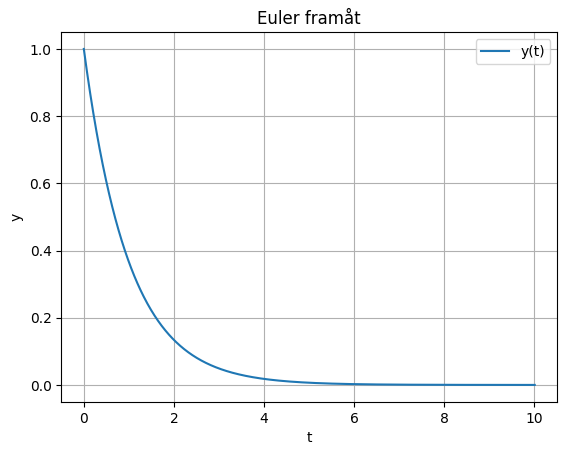

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the smooth curve
plt.plot(ef_t_värde, ef_y_värde, label='y(t)')  # Plot the original data
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler framåt')
plt.legend()
plt.grid(True)
plt.show()

Euler bakåt: $$y_{n+1}=y_n+n f\left(t_{n+1}, y_{m+1}\right)$$

In [6]:
def euler_bakåt(f, y0, t0, t_final, h):
    t_värde = [t0]
    y_värde = [y0]

    while t_värde[-1] < t_final:
        t_next = t_värde[-1] + h
        y_next = y_värde[-1] + h * f(t_next, y_värde[-1])

        t_värde.append(t_next)
        y_värde.append(y_next)

    return t_värde, y_värde

eb_t_värde, eb_y_värde = euler_bakåt(f, y0, t_start, t_slut, h)

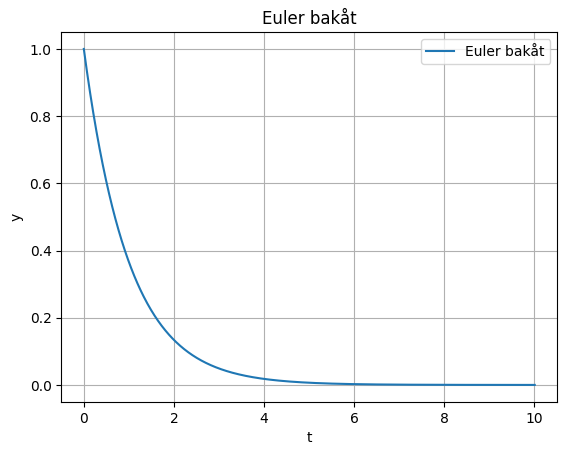

In [7]:
import matplotlib.pyplot as plt

plt.plot(eb_t_värde, eb_y_värde, label='Euler bakåt')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler bakåt')
plt.legend()
plt.grid(True)
plt.show()

RK4 => Runge–Kutta 4: 
$$
y_{n+1}=y_n+\frac{h}{6}\left(k_1+2 k_2+2 k_3+k_4\right)
$$
$$
k_1=f\left(k_n, y_n\right)
$$
$$
k_2=f\left(t_n+\frac{h}{2}, y_n+\frac{h}{2} k_1\right)
$$
$$
k_3=f\left(t_n+\frac{h}{2}, y_n+\frac{h}{2} k_2\right)
$$
$$
k_4=f\left(t_n+h, y_n+hk_3\right)
$$

In [8]:
def rk_fyra(f, y0, t0, t_final, h):
    
    t_värde = [t0]
    y_värde = [y0]
    
    while t_värde[-1] < t_final:
        
        k1=f(t_värde[-1], y_värde[-1])
        k2=f(t_värde[-1]+h/2, y_värde[-1]+h/2*k1)
        k3=f(t_värde[-1]+h/2, y_värde[-1]+h/2*k2)
        k4=f(t_värde[-1]+h, y_värde[-1]+h*k3)
    
        t_next = t_värde[-1] + h
        y_next = y_värde[-1] + h/6*(k1+2*k2+2*k3+k4)

        t_värde.append(t_next)
        y_värde.append(y_next)

    return t_värde, y_värde

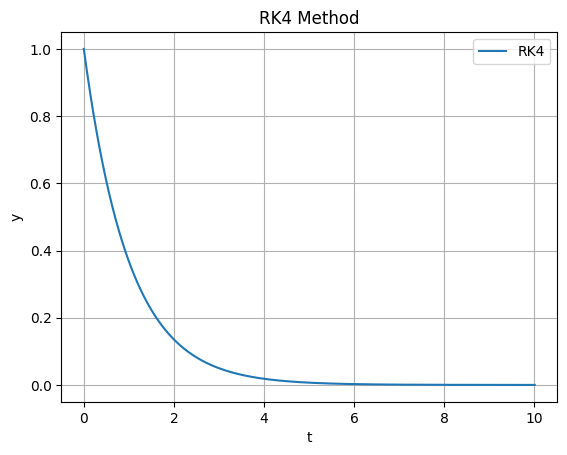

In [9]:
rk4_t_värde, rk4_y_värde = rk_fyra(f, y0, t_start, t_slut, h)

plt.plot(rk4_t_värde, rk4_y_värde, label='RK4')
plt.xlabel('t')
plt.ylabel('y')
plt.title('RK4 Method')
plt.legend()
plt.grid(True)
plt.show()

Vi löser problemet analytiskt:

$$
\frac{d y(t)}{d t}=-y(t) , y(0)=1 \text { : }
$$
$$
\frac{\frac{d y(t)}{d t}}{y(t)}=-1
$$
$$
y(t)=e^{-t+c_1}
$$
$$
y(t)=c_1 e^{-t}
$$
$$
y(t)=e^{-t}
$$

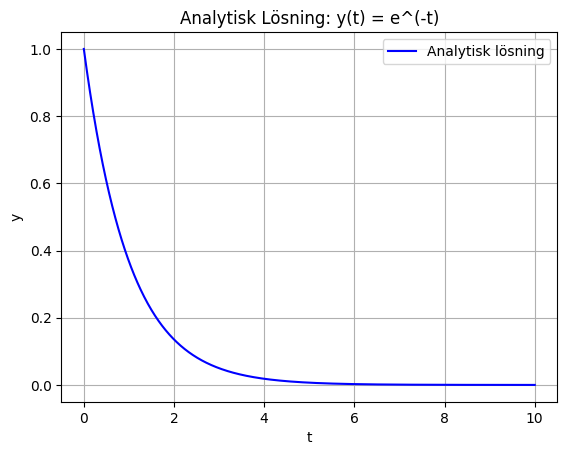

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def analytisk_lösning(t):
    return np.exp(-t)

analytisk_t_värde = np.linspace(0, 10, 1002)
analytisk_y_värde = analytisk_lösning(analytisk_t_värde)


plt.plot(analytisk_t_värde, analytisk_y_värde, label='Analytisk lösning', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Analytisk Lösning: y(t) = e^(-t)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
N_värde = np.array(range(1, 1000))
h_värde=[]

for N in N_värde:
    h = (t_slut - t_start) / N
    h_värde.append(h)

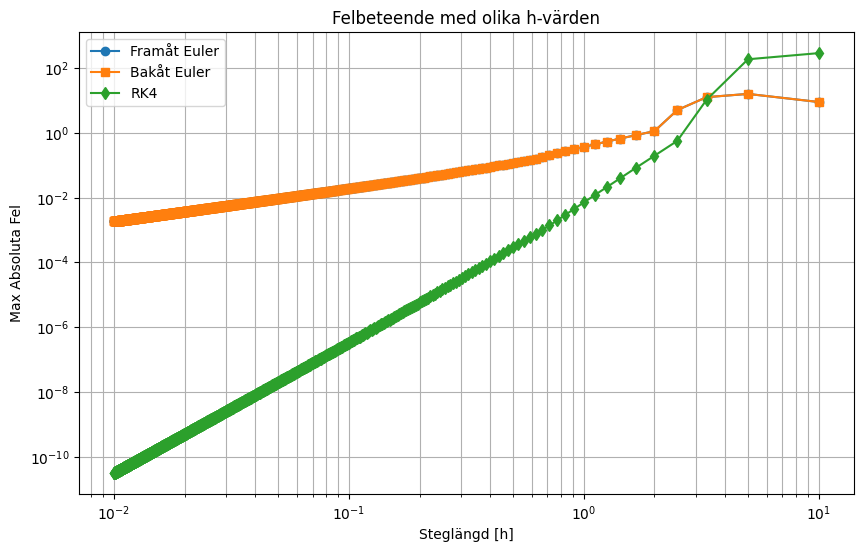

In [12]:
max_errors_ef = []
max_errors_eb = []
max_errors_rk4 = []

for h in h_värde:


    ef_t, ef_y = euler_framåt(f, y0, t_start, t_slut, h)
    eb_t, eb_y = euler_bakåt(f, y0, t_start, t_slut, h)
    rk4_t, rk4_y = rk_fyra(f, y0, t_start, t_slut, h)

  
    analytisk_y = analytisk_lösning(np.array(ef_t))

    max_errors_ef.append(np.max(np.abs(np.array(ef_y) - analytisk_y)))
    max_errors_eb.append(np.max(np.abs(np.array(eb_y) - analytisk_y)))
    max_errors_rk4.append(np.max(np.abs(np.array(rk4_y) - analytisk_y)))

plt.figure(figsize=(10,6))
plt.loglog(h_värde, max_errors_ef, label='Framåt Euler', marker='o')
plt.loglog(h_värde, max_errors_eb, label='Bakåt Euler', marker='s')
plt.loglog(h_värde, max_errors_rk4, label='RK4', marker='d')
plt.xlabel('Steglängd [h]')
plt.ylabel('Max Absoluta Fel')
plt.title('Felbeteende med olika h-värden')
plt.legend()
plt.grid(True, which="both")
plt.show()

Euler Framåt (`euler_framåt`): Det är en explicit metod. Denna metod är enkel men kan vara instabil eller mindre exakt för vissa differentialekvationer eller vid större stegstorlekar.

Det nya värdet $y_{i+1}$ beräknas med hjälp av funktionsvärdet vid den nuvarande tidssteget $y_i$. Denna metod är enkel men kan vara instabil eller mindre exakt för vissa differentialekvationer eller vid större stegstorlekar. För vår funktion blir uppdateringsekvationen: $$y_{i+1} = y_i + h \times (-y_i)$$

Euler Bakåt (`euler_bakåt`): Det är en implicit metod. Denna metod antar att funktionen förblir konstant över intervallet, lika med dess värde i slutet av intervallet (som vi initialt inte vet). Denna strategi kan vara stabilare än Euler Framåt för vissa typer av problem, särskilt styva differentialekvationer.

För vår funktion kan uppdateringsekvationen härledas som:
$$
y_{i+1}=y_i+h \times\left(-y_{i+1}\right)
$$
Detta leder till:
$$
y_{i+1}=\frac{y_i}{1+h}
$$

Med tanke på att differentialekvationen är linjär, kan Euler Bakåt-metoden lösas explicit. 
För icke-linjära differentialekvationer kräver Euler Bakåt ofta en iterativ metod eller lösare för att finna $y_{i+1}$

$$y_{n+1}=y_n+h f\left(t_{n+1}, y_{n+1}\right)$$
$$
\begin{gathered}
y_{n+1}=y_n-h y_{n+1} \Leftrightarrow(1+h) y_{n+1}=y_n \Leftrightarrow y_{n+1}=\frac{1}{1+h} y_n \\
\frac{1}{|1+h|}<1 \Rightarrow-1<\frac{1}{1+h}<1
\end{gathered}
$$

\begin{align*}
y^{\prime} &= \lambda y, \quad y(0) = y_0 \\
y(t) &= y_0 e^{\lambda t} \\ 
\lambda < 0 &\quad y_{n+1} = y_n-h y_n = (1-h) y_n \\
& = (1-n)(1-h) y_{n-1} \\
& = \cdots = (1-h)^{n+1} y_0 \\
|1-h| &> 1 \Rightarrow \text{ instabil lösning } \\
& \text{Vi vill } |1-h| < 1 \\
& \Leftrightarrow -1 < 1-h < 1 \\
& h < 2
\end{align*}


Problem 2: 

$$
\text { Lös systemet } \begin{cases}\frac{d x}{d t}=y & x(0)=1 \\ \frac{d y}{d t}=-x & y(0)=1\end{cases}
$$

$$
\text { Plotta } \quad(x(t), y(t)) \text { for } t \in[0,20]
$$

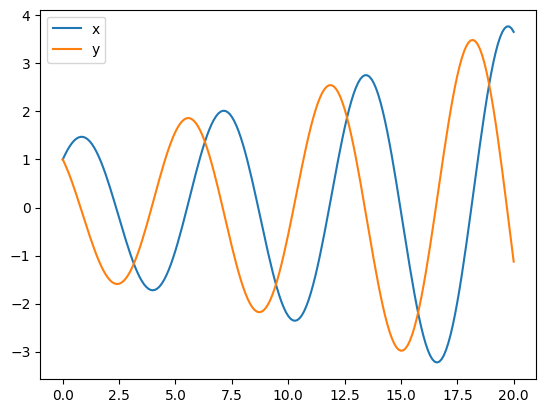

In [13]:
t_start = 0
t_slut = 20
n = 200
h = (t_slut - t_start) / n
x = 1
y = 1
t_list = [t_start]
x_list = [x]
y_list = [y]

g = lambda x,y: (x+h*y, y-h*x)

while t_list[-1] < t_slut:
    x, y = (x + h * y, y - h * x)
    t_list.append(t_list[-1] + h)
    x_list.append(x)
    y_list.append(y)

plt.plot(t_list, x_list, label='x')
plt.plot(t_list, y_list, label='y')
plt.legend()
plt.show()